## Лекция. Функции и работа с данными. 
### Репозиторий для домашего задания по лекции
### Домашнее задание

#### Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [67]:
import pandas as pd
ratings = pd.read_csv('../datasets/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [69]:
def ratings_class (rating):
    if rating <= 2:
        return 'low'
    elif rating <= 4:
        return 'middle'
    return 'high'

ratings['class'] = ratings['rating'].apply(ratings_class)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,middle
1,1,3,4.0,964981247,middle
2,1,6,4.0,964982224,middle
3,1,47,5.0,964983815,high
4,1,50,5.0,964982931,high


In [83]:
ratings['class'].value_counts(normalize=True)*100

middle    65.007537
high      21.581578
low       13.410885
Name: class, dtype: float64

#### Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = { 'Центр': ['москва', 'тула', 'ярославль'],'Северо-Запад': ['петербург', 'псков', 'мурманск'],'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']}

Результат классификации запишите в отдельный столбец region.

In [59]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

keywords = pd.read_csv('keywords.csv')

In [60]:
def geo_loc (string):
    for key, value in geo_data.items():
        for s in value:
            if string.lower().count(s)>0:
                return key
    return 'undefined'

keywords['region'] = keywords['keyword'].apply(geo_loc)
keywords.groupby('region')['keyword'].count().reset_index()

,region,keyword
0,undefined,99253
1,Дальний Восток,94
2,Северо-Запад,266
3,Центр,387


#### Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

    В переменную years запишите список из всех годов с 1950 по 2010.

    Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
        для каждой строки пройдите по всем годам списка years
        если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
        если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

    Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

    Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [137]:
years = list(i for i in range(1950,2011))

In [138]:
ratings = pd.read_csv('../datasets/ml-latest-small/ratings.csv')
movies = pd.read_csv('../datasets/ml-latest-small/movies.csv')

In [139]:
def production_year(string):
    for s in years:
            if string.count(str(s))>0:
                return s
    return 1900

movies['year'] = movies['title'].apply(production_year)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [140]:
# считаем средний рейтинг фильмов 
avg_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
print(len(ratings['movieId'].unique()))  # проверяем, чтобы число уникальных записей фильмов совпало с новым дата фреймом
print(len(avg_ratings['movieId'].unique())) #совпало, ничего не потеряли

9724
9724


In [141]:
# добавляем рейтинги в дата фрейм с фильмами
new_movies = movies.merge(avg_ratings, how='left', on='movieId')
new_movies.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429


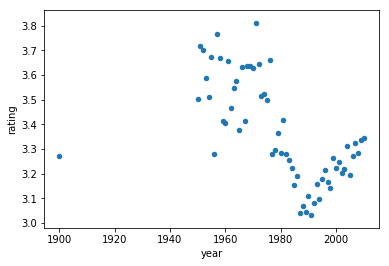

In [152]:
""" считаем средний рейтинг всех фильмов для каждого значения столбца ‘year’,
сортируем результат по убыванию рейтинга и сразу строим график
""" 
%matplotlib inline

(new_movies
 .groupby('year')['movieId','rating']
 .agg({'movieId': 'count', 'rating': 'mean'})
 .sort_values(by='rating',ascending=False)
 .reset_index()
 .plot.scatter(x='year', y='rating')
)
# гипотеза НЕ ПОДТВЕРДИЛАСЬ, т.к. тренд был на снижение рейтинга с 1950 по 1990 гг., 
# однако потом тренд сменился на восходящий